In [36]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import seanfunc as sf
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


### Problem 1: The iris dataset

A) do a train-test split of the data
B) do EDA on the training data
C) Make a linear regression model from the training data of sepal_length based on the other four variables
D) Make a linear regression model from the training data of petal_width based on the other four variables
E) Compute the mean_squared_error and r2_score using the *test data* for your models from C) and  D) above .


In [3]:
iris = pd.read_csv('iris.csv')
iris.head()  #need to get rid of old index column

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# get rid of 'Unnamed: 0'
iris = iris.iloc[:,1::]

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
train, test = sf.statsmodels_train_test_split(iris)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 1 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [9]:
train['species'].value_counts()

setosa        41
versicolor    40
virginica     39
Name: species, dtype: int64

In [10]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.823333,3.055833,3.709167,1.179167
std,0.837537,0.456290,1.773426,0.758470
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.750000,3.000000,4.200000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


IndexError: index 4 is out of bounds for axis 0 with size 4

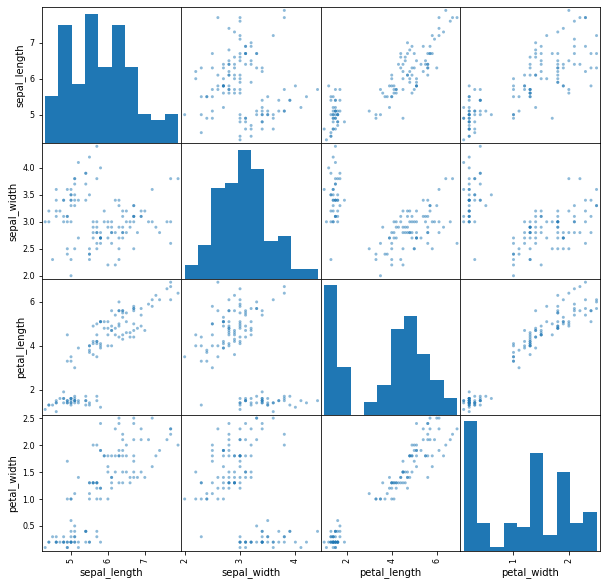

In [11]:
scatter_matrix(train, figsize=[10,10])[4]


In [12]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
l_m = smf.ols(formula='sepal_length ~ sepal_width + petal_length + petal_width + C(species)', data=train).fit()

In [14]:
l_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     161.0
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           5.95e-50
Time:                        15:49:44   Log-Likelihood:                -23.270
No. Observations:                 120   AIC:                             58.54
Df Residuals:                     114   BIC:                             75.27
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.9916      0.295      6.747      0.000       1.407       2.576
C(species)[T.versicolor]    -0.7669      0.252     -3.039      0.003      -1.267      -0.267
C(species)[T.virginica]     -1.2372      0.353     -3.504      0.001      -1.937      -0.538
sepal_width                  0.5261      0.090      5.818      0.000       0.347       0.705
petal_length                 0.8841      0.075     11.771      0.000       0.735       1.033
petal_width                 -0.3371      0.168     -2.004      0.047      -0.670      -0.004
==============================================================================
Omnibus:                        0.859   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.884
Skew:                          -0.039   Prob(JB):                        0.643
Kurtosis:                       2.587   Cond. No.                         89.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
l_m.params

Intercept                   1.991567
C(species)[T.versicolor]   -0.766877
C(species)[T.virginica]    -1.237163
sepal_width                 0.526069
petal_length                0.884118
petal_width                -0.337061
dtype: float64

In [16]:
predictions = l_m.predict(test)

In [17]:
predictions

72     6.366451
141    6.118981
133    6.230809
35     4.668517
61     6.010602
143    6.878882
119    5.826756
2      4.756929
90     6.078117
104    6.718963
85     6.452559
56     6.576776
27     5.091573
0      5.003161
122    7.476868
12     4.773833
112    6.487433
145    6.154786
69     5.617157
66     6.275838
8      4.687520
84     6.275838
115    6.348411
20     5.215790
147    6.255904
125    7.135825
48     5.196787
44     5.535629
91     6.397956
97     6.113820
dtype: float64

In [18]:
r2_score(test['sepal_length'], predictions)

0.8041221967964991

In [19]:
mean_squared_error(test['sepal_length'], predictions)

0.12048878959054461

In [20]:
l_m_w = smf.ols(formula='petal_width ~ sepal_length + petal_length + sepal_width + C(species)', data=train).fit()

In [21]:
l_m_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     480.3
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           8.01e-75
Time:                        15:50:35   Log-Likelihood:                 49.043
No. Observations:                 120   AIC:                            -86.09
Df Residuals:                     114   BIC:                            -69.36
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.3370      0.188     -1.788      0.076      -0.710       0.036
C(species)[T.versicolor]     0.5380      0.134      4.001      0.000       0.272       0.804
C(species)[T.virginica]      0.9054      0.185      4.897      0.000       0.539       1.272
sepal_length                -0.1010      0.050     -2.004      0.047      -0.201      -0.001
petal_length                 0.2724      0.056      4.897      0.000       0.162       0.383
sepal_width                  0.2030      0.053      3.825      0.000       0.098       0.308
==============================================================================
Omnibus:                        7.247   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.027   Jarque-Bera (JB):               11.287
Skew:                          -0.215   Prob(JB):                      0.00354
Kurtosis:                       4.440   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
l_m_w.params

Intercept                  -0.336978
C(species)[T.versicolor]    0.537977
C(species)[T.virginica]     0.905429
sepal_length               -0.100991
petal_length                0.272411
sepal_width                 0.202971
dtype: float64

In [23]:
predictions_w = l_m_w.predict(test)

In [24]:
r2_score(test['petal_width'], predictions_w)

0.9479590119120471

In [25]:
mean_squared_error(test['petal_width'], predictions_w)

0.030995612505184723

### Problem 2: The penguin dataset DATA

A) do a train-test split of the data
B) do EDA on the training data
C) Make a linear regression model from the training data of flipper length based on the other variables
D) Compute the mean_squared_error and r2_score using the *test data* for your model

In [26]:
pens = pd.read_csv('penguins.csv')
pens.head() ##need to get rid of old index column

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [27]:
pens = pens.iloc[:,1::]

In [28]:
pens.dropna(inplace=True) #get rid of NA rows prior to split

In [29]:
pens.reset_index(drop=True, inplace=True) #reset index b/c of dropped rows

In [30]:
ptrain, ptest = sf.statsmodels_train_test_split(pens)

In [31]:
ptrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 1 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            267 non-null    object 
 1   island             267 non-null    object 
 2   bill_length_mm     267 non-null    float64
 3   bill_depth_mm      267 non-null    float64
 4   flipper_length_mm  267 non-null    float64
 5   body_mass_g        267 non-null    float64
 6   sex                267 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.7+ KB


In [32]:
ptrain.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,267.000000,267.000000,267.000000,267.00000
mean,44.168914,17.113109,201.456929,4226.59176
std,5.476639,1.933465,14.424063,808.27766
min,32.100000,13.100000,172.000000,2850.00000
25%,39.550000,15.600000,190.000000,3587.50000
50%,45.100000,17.300000,197.000000,4050.00000
75%,48.750000,18.600000,214.000000,4825.00000
max,59.600000,21.200000,231.000000,6300.00000


AttributeError: 'numpy.ndarray' object has no attribute 'show'

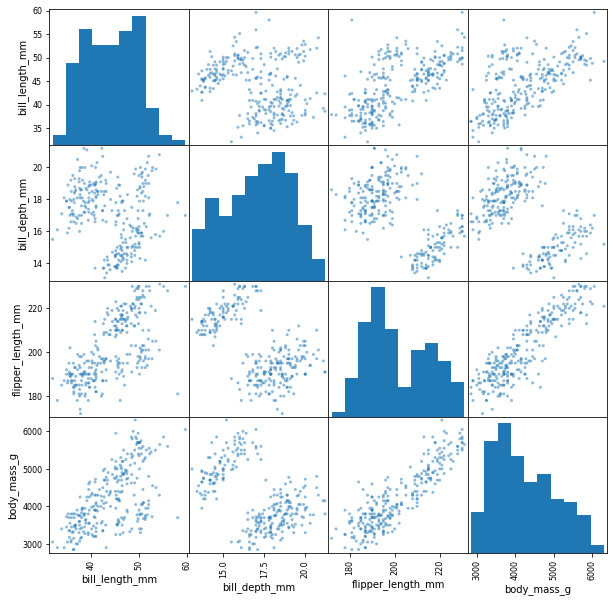

In [33]:
scatter_matrix(ptrain,figsize=[10,10]).show()

#### There seems to be two distinct groups when looking at bill_depth vs body_mass and bill_depth

In [34]:
ptrain['sbin'] = np.where(ptrain['sex']=='MALE', 1, 0) #binarize groups, we'll start with M/F

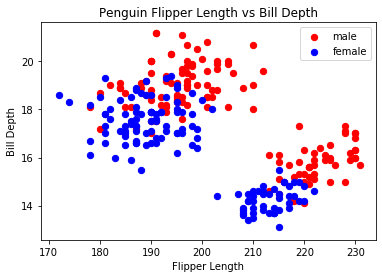

In [63]:
fig, ax = plt.subplots()

def make_insects_scatter_plot(ax, col, l1, l2):
    sex_boolean = ptrain[col].astype(bool)
    ax.scatter(ptrain.flipper_length_mm[sex_boolean], 
               ptrain.bill_depth_mm[sex_boolean],
               s=40, c="red", label=l1)
    ax.scatter(ptrain.flipper_length_mm[~sex_boolean], 
               ptrain.bill_depth_mm[~sex_boolean],
               s=40, c="blue", label=l2)
    ax.set_xlabel("Flipper Length")
    ax.set_ylabel("Bill Depth")
    ax.set_title("Penguin Flipper Length vs Bill Depth")
    ax.legend()
    
make_insects_scatter_plot(ax, 'sbin', 'male', 'female')

In [38]:
ptrain.species.value_counts()  #now lets try species

Adelie       114
Gentoo        97
Chinstrap     56
Name: species, dtype: int64

In [64]:
ptrain['specbin'] = np.where(ptrain.loc[:, 'species']=='Adelie', 1, 0)

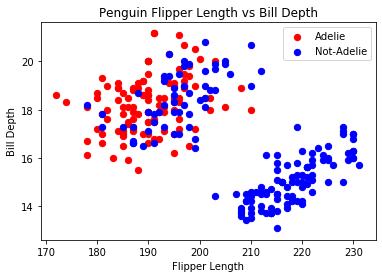

In [65]:

fig, ax = plt.subplots()
make_insects_scatter_plot(ax, 'specbin', 'Adelie', 'Not-Adelie')

In [66]:
ptrain['specbin'] = np.where(ptrain.loc[:, 'species']=='Gentoo', 1, 0)

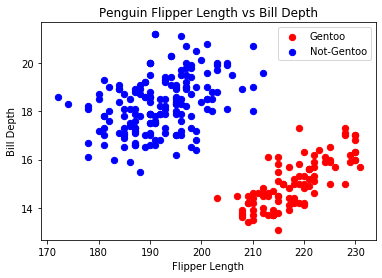

In [67]:
fig, ax = plt.subplots()
make_insects_scatter_plot(ax, 'specbin', 'Gentoo', 'Not-Gentoo')

#### We found it! If the penguin is Gentoo species it's different from non-Gentoos

In [44]:
ptrain

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sbin,specbin
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,0
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE,0,0
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE,0,0
...,...,...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0,1
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0,1
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1,1
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0,1


In [50]:
pl_m = smf.ols(formula='flipper_length_mm ~ C(island) + bill_length_mm +'
               'bill_depth_mm + body_mass_g + C(sex) +C(specbin)', data=ptrain).fit()

In [51]:
pl_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     265.0
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          3.63e-114
Time:                        16:01:40   Log-Likelihood:                -810.68
No. Observations:                 267   AIC:                             1637.
Df Residuals:                     259   BIC:                             1666.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                135.8078      7.133     19.040      0.000     121.762     149.854
C(island)[T.Dream]         1.4943      1.133      1.319      0.188      -0.737       3.725
C(island)[T.Torgersen]     3.7158      1.294      2.871      0.004       1.167       6.264
C(sex)[T.MALE]             0.8637      1.010      0.855      0.393      -1.125       2.853
C(specbin)[T.1]           19.5325      2.473      7.898      0.000      14.663      24.402
bill_length_mm             0.4944      0.082      6.027      0.000       0.333       0.656
bill_depth_mm              0.6972      0.401      1.740      0.083      -0.092       1.486
body_mass_g                0.0055      0.001      5.218      0.000       0.003       0.008
==============================================================================
Omnibus:                        5.331   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                6.496
Skew:                          -0.154   Prob(JB):                       0.0389
Kurtosis:                       3.700   Cond. No.                     9.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
pl_m.params

Intercept                 135.807831
C(island)[T.Dream]          1.494319
C(island)[T.Torgersen]      3.715774
C(sex)[T.MALE]              0.863700
C(specbin)[T.1]            19.532541
bill_length_mm              0.494416
bill_depth_mm               0.697180
body_mass_g                 0.005514
dtype: float64

#### Add my new column to test data

In [54]:
ptest['specbin'] = np.where(ptest.loc[:, 'species']=='Gentoo', 1, 0)

In [68]:
pen_preds = pl_m.predict(ptest)

In [69]:
pen_preds

223    218.477864
14     201.279799
72     188.221765
319    211.736944
116    190.275465
          ...    
64     189.184378
187    192.471954
156    193.706016
105    198.735354
240    221.450547
Length: 66, dtype: float64

In [70]:
r2_score(ptest['flipper_length_mm'], pen_preds)

0.7748328036109031

In [71]:
mean_squared_error(ptest['flipper_length_mm'], pen_preds)

32.59119417395237

### Problem 3: Using data1.csv
A) do a train-test split of the data
B) Make a linear regression model of Y vs X
C) Compute the mean_squared_error and r2_score using the *test data* for your model

In [72]:
d1 = pd.read_csv('data1.csv')

In [73]:
d1.head()

,Unnamed: 0,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


In [74]:
d1 = d1.iloc[:,1:]

In [78]:
d1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [213]:
dtrain, dtest = sf.statsmodels_train_test_split(d1)

AttributeError: 'numpy.ndarray' object has no attribute 'show'

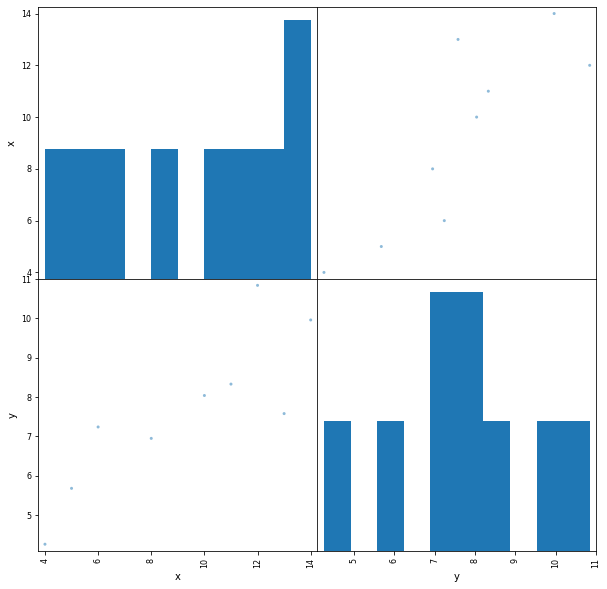

In [214]:
scatter_matrix(dtrain,figsize=[10,10]).show() ##x seems to be discrete

In [215]:
l_md1 = smf.ols(formula='y ~ x', data=dtrain).fit()

In [216]:
l_md1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     17.75
Date:                Tue, 08 Sep 2020   Prob (F-statistic):            0.00397
Time:                        17:00:36   Log-Likelihood:                -12.818
No. Observations:                   9   AIC:                             29.64
Df Residuals:                       7   BIC:                             30.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3423      1.092      3.062      0.018       0.761       5.923
x              0.4675      0.111      4.213      0.004       0.205       0.730
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   2.494
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.022
Skew:                           0.103   Prob(JB):                        0.989
Kurtosis:                       2.872   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
l_md1.params

Intercept    3.342284
x            0.467463
dtype: float64

In [218]:
d1preds = l_md1.predict(dtest)

In [219]:
r2_score(dtest['y'], d1preds)

0.3958198295118517

In [220]:
mean_squared_error(dtest['y'], d1preds)

2.4046521830470926

In [258]:
d2,d3, d4 = pd.read_csv('data2.csv'), pd.read_csv('data3.csv'), pd.read_csv('data4.csv')

In [259]:
d2,d3, d4 = d2.iloc[:,1:], d3.iloc[:,1:], d4.iloc[:,1:]

AttributeError: 'numpy.ndarray' object has no attribute 'show'

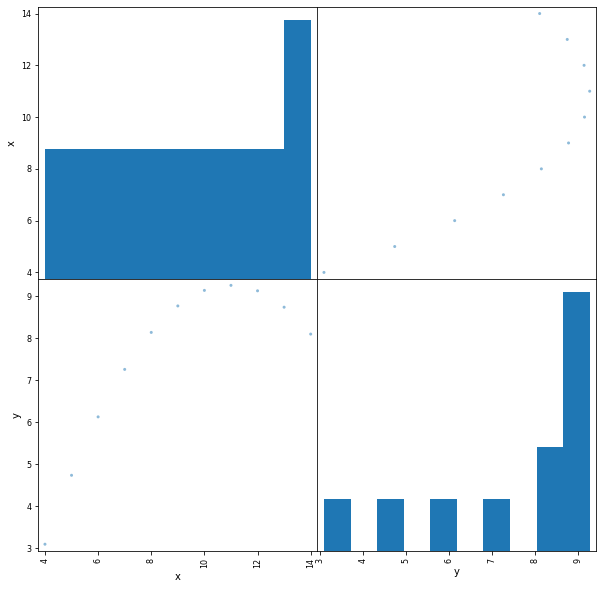

In [260]:
scatter_matrix(d2,figsize=[10,10]).show() ##x seems to be discrete

In [250]:
dtrain2, dtest2 = sf.statsmodels_train_test_split(d2)

In [251]:
dtrain3, dtest3 = sf.statsmodels_train_test_split(d3)

In [252]:
dtrain4, dtest4 = sf.statsmodels_train_test_split(d4)

AttributeError: 'numpy.ndarray' object has no attribute 'show'

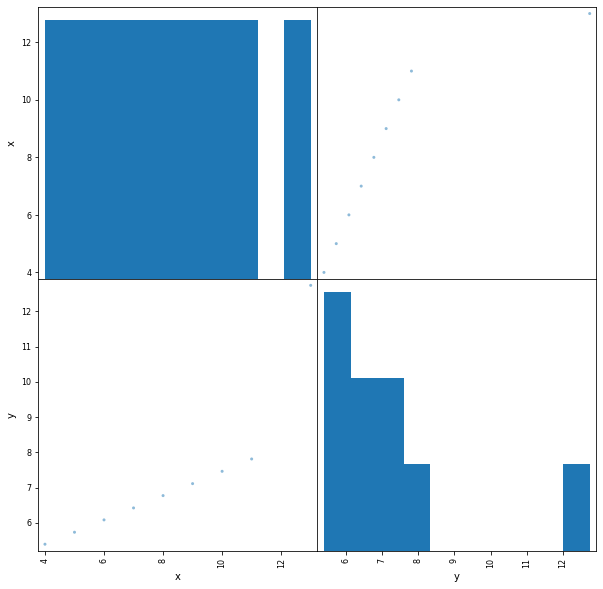

In [253]:
scatter_matrix(dtrain3,figsize=[10,10]).show() ##x seems to be discrete

AttributeError: 'numpy.ndarray' object has no attribute 'show'

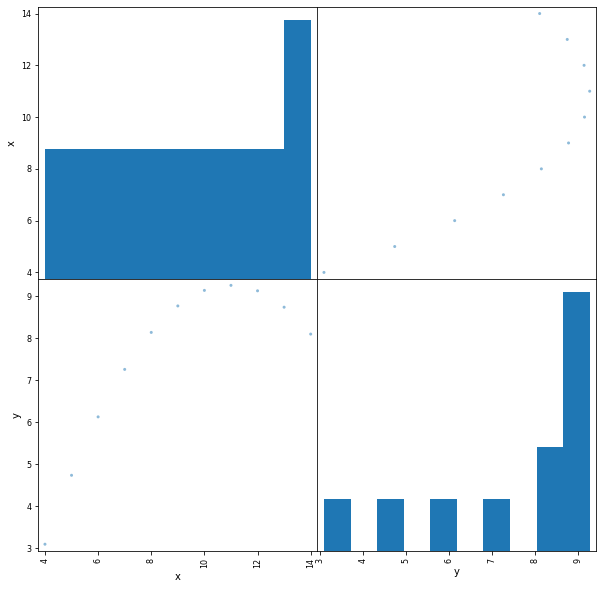

In [254]:
scatter_matrix(d2,figsize=[10,10]).show() ##x seems to be discrete

In [242]:
l_md2, l_md3, l_md4 = smf.ols(formula='y ~ x', data=dtrain2).fit(), \
    smf.ols(formula='y ~ x', data=dtrain3).fit(),smf.ols(formula='y ~ x', data=dtrain4).fit() 

In [243]:
l_md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     18.05
Date:                Tue, 08 Sep 2020   Prob (F-statistic):            0.00380
Time:                        17:17:06   Log-Likelihood:                -13.833
No. Observations:                   9   AIC:                             31.67
Df Residuals:                       7   BIC:                             32.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4947      1.243      2.007      0.085      -0.444       5.434
x              0.5316      0.125      4.249      0.004       0.236       0.828
==============================================================================
Omnibus:                        0.993   Durbin-Watson:                   2.565
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.667
Skew:                          -0.277   Prob(JB):                        0.716
Kurtosis:                       1.787   Cond. No.                         29.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
l_md3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     10.90
Date:                Tue, 08 Sep 2020   Prob (F-statistic):             0.0131
Time:                        17:17:22   Log-Likelihood:                -14.649
No. Observations:                   9   AIC:                             33.30
Df Residuals:                       7   BIC:                             33.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7970      1.601      1.747      0.124      -0.988       6.582
x              0.5172      0.157      3.302      0.013       0.147       0.888
==============================================================================
Omnibus:                       15.526   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.995
Skew:                           1.822   Prob(JB):                       0.0303
Kurtosis:                       5.319   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
l_md4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     23.18
Date:                Tue, 08 Sep 2020   Prob (F-statistic):            0.00193
Time:                        17:17:24   Log-Likelihood:                -12.387
No. Observations:                   9   AIC:                             28.77
Df Residuals:                       7   BIC:                             29.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9158      1.032      2.826      0.026       0.476       5.356
x              0.5044      0.105      4.815      0.002       0.257       0.752
==============================================================================
Omnibus:                        0.168   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.305
Skew:                          -0.233   Prob(JB):                        0.859
Kurtosis:                       2.228   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
d2preds, d3preds, d4preds = l_md2.predict(dtest2), l_md3.predict(dtest3), l_md4.predict(dtest4)

In [255]:
r2_score(dtest2['y'], d2preds)

-1.1985462718121696

In [256]:
r2_score(dtest3['y'], d3preds)

-67.45657003237969

In [257]:
r2_score(dtest4['y'], d4preds)

-0.03361111111108883

### Problem 4: Using data3.csv
A) do a train-test split of the data
B) Make a linear regression model of Y vs X
C) Compute the mean_squared_error and r2_score using the *test data* for your model

### Problem 5: Using data4.csv
A) do a train-test split of the data
B) Make a linear regression model of Y vs X
C) Compute the mean_squared_error and r2_score using the *test data* for your model